# Differential Equations and Yeast Growth Rates
## Morgan Baxter
### MATH 219 Project 3

Yeast is a relatively simple single-cell organism that converts carbohydrates into CO2 and ethanol alcohol during the process of fermentation. In this project, we seek to solve a system of differential equations that can be applied to existing data about yeast growth, and then try to fit the system to the data.

We are given the following system of differential equations. Here, P(t) represents the population count of yeast with respect to time, and q(t) represents the quantity of some "critical" substance that directly influences either yeast growth or death.

$$\frac{d P}{d t} = c \frac{q(t)}{1 + q(t)} P(t) \left (1 - \left ( \frac{P(t)}{N} \right)^m \right ), P(0) = P_0 $$

$$\frac{d q(t)}{d t} = k \cdot q(t), q(0) = q_0$$

First, we can solve for $q(t)$ from the second equation using seperable methods. Since this is a first order seprable ODE, solving is trivial: collect terms, integrate, raise both sides to the power of $e$, and invoke the initial conditions $q(0) = q_0$ to get the solution:

$$q(t) = q_0 e^{kt} $$


We then seek to carry out a change of variable to simplify the first equation in our IVP pair. We make a series of substitutions, the first being $r(t) = \frac{q(t)}{1 + q(t)}$, as well as $\frac{u}{t} = c \cdot r(t)$, such that we can rewrite equation 1.1 as:

$$\frac{d P}{d t} = \frac{u}{t} P(t) \left (1 - \left ( \frac{P(t)}{N} \right)^m \right ) $$

Let us note that:

$$\lim_{t\to\infty} r(t) = \lim_{t\to\infty}\frac{q(t)}{1 + q(t)} = 1$$

Next, we define a new dependent variable $\gamma(u)$, so $\gamma$ is implicitly a function of $t$, and set $\gamma = \frac{P}{N}$. Our investigation guidelines suggested using $p$ for this variable, but we chose to use $\gamma$ to prevent confusion between upper and lowercase $p$. Starting from our last expression for $\frac{d P}{d t}$, we can easily substitute in $\gamma$, and use the chain rule to seperate $\frac{d P}{d t}$ into $\frac{d P}{d u} \frac{d u}{d t}$:


$$\frac{d P}{d t} = \frac{d P}{d u} \frac{d u}{d t} = \frac{d u}{d t} P(t) \left (1 - \gamma^m \right ) $$

We can then divide by $\frac{d u}{d t}$ on both sides, to get a simplified expression for $\frac{d P}{d u}$:

$$ \frac{d P}{d u} = P(t) \left (1 - \gamma^m \right ) $$

Solving for this (simplified) differential equation is non-trivial. The term $\gamma^m$ means this is a nonlinear ODE, which is slightly more difficult to solve. Putting this expression into WolframAlpha, we get out that this can be expressed as a Bernoulli equation:

$$\gamma ' (u) = \gamma (u) - \gamma (u)^{1+m}$$

We are not yet equipped to solve this, but any technique that could be used to solve the Bernoulli expression would likely give us the given solution. The given solution to this differential equation is:

$$\gamma (u) = \left ( 1 + \left ( \left ( \frac{P_0}{N} \right )^{-m} -1 \right ) e^{-mu} \right )^{-1/m} $$

We can rewrite this very easily to find $P(t)$ by remembering our substitutions for $\gamma(u)$ and $r(t)$:

$$ P(t) = N \left ( 1 + \left ( \left ( \frac{P_0}{N} \right )^{-m} -1 \right ) e^{-mu} \right )^{-1/m} $$

Here, $u = \frac{k}{c}\ln \left (1-q_0 e^{kt} \right ) $. 

Below is the data acquired from Baxter about yeast growth in lab conditions. I entered the first three digits of the data and then multiplied by $1000$ to get the order of magnitude correct. The code below also initializes a list of times in hours that correspond to the yeast count, and imports the python packages I will use to plot and fit data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

yeast_count = [759,790,747,747,714,726,683,689,645,623,627,635,656,616,624,604,614,606,594,589,618,611,600,609,616,635,636,655,657,675,699,720,744,757,790,791,780,815,829,847,837,856,858,887,882,859,867]
yeast_count = [i * 1000 for i in yeast_count]
hour_count = [(i*0.5)+0.5 for i in range(47)]
print(yeast_count)

[759000, 790000, 747000, 747000, 714000, 726000, 683000, 689000, 645000, 623000, 627000, 635000, 656000, 616000, 624000, 604000, 614000, 606000, 594000, 589000, 618000, 611000, 600000, 609000, 616000, 635000, 636000, 655000, 657000, 675000, 699000, 720000, 744000, 757000, 790000, 791000, 780000, 815000, 829000, 847000, 837000, 856000, 858000, 887000, 882000, 859000, 867000]


Now, we can plot the data. This shape confused me, because it didn't appear to have a single trend (either up or down). It's also relatively noisy, but that is expected out of almost any real-world dataset.

Text(0, 0.5, 'Cell Count per mL')

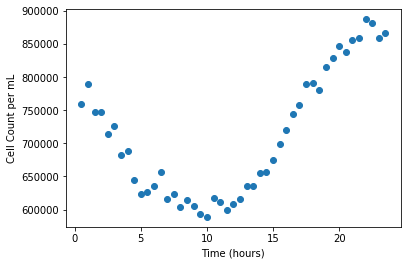

In [2]:
plt.scatter(hour_count,yeast_count)
plt.xlabel("Time (hours)")
plt.ylabel("Cell Count per mL")

I decided to play around a little bit in Desmos to get an idea for the approximate values. Below is a screenshot from a semi-fruitful attempt at getting order-of-magnitude approximations.

<div>
<img src="https://i.imgur.com/DudQlT6.png" width="800"/>
</div>

You may notice in the definition for the red line, there is a sneaky plus at the end. Out of view, I added $589,000$ to increase the y-intercept of my function. The key fact that I learned from Desmos is that $m$ has a strong influence over the shape of the curve. Setting $m=-0.5$ seemed to get the curve into the shape I wanted. In order to plot in Python, we need to define a function that takes the input points and returns a list containing the function output. This is accomplished in the function below:

In [3]:
def my_func(t,N,k,q0,c,P0):
    m=-0.5
    val = []
    for i in t:
        u = (k/c)*np.log(np.abs((1+q0*np.exp(k*i))/(1+q0)))
        square_brackets = 1+((P0/N)**(-m)-1)*np.exp(-m*u)
        val.append(N*(square_brackets)**(-1/m) + 589000)
    return val

$$P(t) = N \left [1 + \left (\left (\frac{P_0}{N} \right )^{0.5} -1 \right )e^{0.5u} \right ]^{(0.5)^{-1}} + 589,00 $$

$$u = \frac{k}{c} \ln \left ( \left | \frac{1+q_0 e^{kt}}{1+q_0} \right | \right )$$

Now, we can plot the data alongside an approximate fit. I changed a few values: $N=80000$, $k=1.08$, $c=3.5$

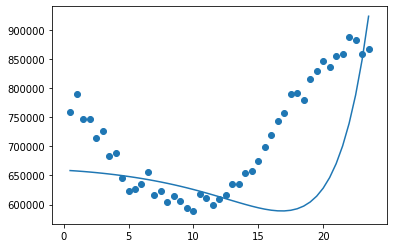

In [10]:
plt.plot(hour_count, my_func(hour_count, N=80000, k=1.08, q0=2, c=3.5,P0=70000))
plt.scatter(hour_count,yeast_count)

Now is when things get messy. I call a curve fitting function from the SciPy package, handing it my function, and x and y values for the data, along with initial guesses for the coeffcients above.

In [12]:
opt.curve_fit(my_func, hour_count, yeast_count, p0=[80000, 1.08, 2, 3.5, 70000], maxfev=100000)

(array([1.79087362e+10, 1.70818243e+00, 2.62384388e+05, 4.27744341e+03,
        2.01385596e+05]),
 array([[ 1.24288271e+24, -9.47495788e+14, -7.27137422e+20,
         -4.59629574e+18,  1.63958036e+16],
        [-9.47495549e+14,  4.06673956e+07, -5.35617893e+12,
          2.03528178e+11, -1.43470880e+07],
        [-7.27137458e+20, -5.35617876e+12,  1.90933429e+19,
         -2.69076521e+16, -7.36327953e+12],
        [-4.59629455e+18,  2.03528178e+11, -2.69076529e+16,
          1.01861516e+15, -6.98884957e+10],
        [ 1.63958036e+16, -1.43470912e+07, -7.36327906e+12,
         -6.98885113e+10,  5.38844763e+08]]))

Our five coefficients are the five values after the first `array` statement above. Taking the coefficients from the fit and plotting them, we get:

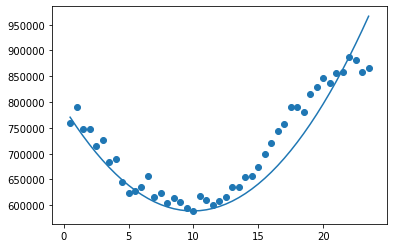

In [13]:
plt.plot(hour_count, my_func(hour_count, N=1.79087362e+10, k=1.7, q0=2.62384388e+05, c=4.27744341e+03,P0=2.01385596e+05))
plt.scatter(hour_count,yeast_count)

This looks pretty good! The output values from the curve fit deviate significantly from my guesses, but the fit is much more accurate. Let's now define new lists containing the slightly sparser data from Baxter, and make a scatter plot:

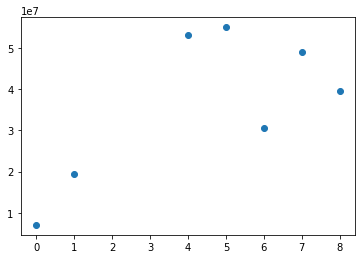

In [14]:
yeast_count_2 = [7.05e6, 1.95e7, 5.3e7, 5.5e7, 3.05e7, 4.9e7, 3.95e7]
day_count = [0, 1, 4, 5, 6, 7, 8]
plt.scatter(day_count, yeast_count_2)

To fit this, I went back to Desmos and found a new value of $m$ should be positive. I added $m$ as a parameter to the earlier function to try for a fit, and used initial values I got after playing around in Desmos for a bit. Unfortunately, despite my best efforts, I got plenty of `overflow` or `invalid value` errors:

In [17]:
def baxter_func(t,N,k,q0,c,P0,m):
    val = []
    for i in t:
        u = (k/c)*np.log(np.abs((1+q0*np.exp(k*i))/(1+q0)))
        square_brackets = 1+((P0/N)**(-m)-1)*np.exp(-m*u)
        val.append(N*(square_brackets)**(-1/m) + 7.05*10**6)
    return val
opt.curve_fit(baxter_func, hour_count, yeast_count, p0=[40000000, 1.5, 9.2, 3.5, 70000,0.4], maxfev=100000)

/home/morgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/morgan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


(array([-6.34322691e+06,  4.99534236e+00, -1.00000001e+00, -3.08626708e+01,
        -1.07307867e+06, -1.21004956e+00]),
 array([[ 2.89154449e+08, -4.75853482e+06, -2.86891309e+01,
          8.65309429e+08, -1.36596917e+15,  3.15212692e+07],
        [-4.75853434e+06,  1.60886054e+06,  3.71065147e+00,
         -2.42514710e+08,  1.90062193e+14, -8.71099062e+06],
        [-2.86891437e+01,  3.71065518e+00,  1.21902242e-04,
         -1.29538594e+02,  5.37660297e+09, -3.23881889e+00],
        [ 8.65309293e+08, -2.42514695e+08, -1.29537959e+02,
          4.11139937e+10, -1.03645319e+16,  1.49132874e+09],
        [-1.36596972e+15,  1.90062355e+14,  5.37660290e+09,
         -1.03645599e+16,  2.37671947e+23, -3.12058211e+14],
        [ 3.15212641e+07, -8.71099002e+06, -3.23879584e+00,
          1.49132873e+09, -3.12057196e+14,  5.41362560e+07]]))

However, my fit in Desmos is relatively good:

<div>
<img src="https://i.imgur.com/sXIuYdY.png" width="800"/>
</div>

Overall, I would consider this function to have far too many parameters to be an effective model for Yeast growth. With more time, I likely could simplify or improve this function to be less cumbersome. My instincts from physics tell me that there are likely first or even second order approximations that would provide considerably more accuracy for a problem of this type than the large $P(t)$ function I ended up using.